In [241]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import pylab
import matplotlib.ticker as ticker

In [ ]:
# # Here the num variable is set:
# num=0

# # A list with all the glacier names
# glacier = ['Kokanee', 'Haig', 'Conrad', 'Washmawapta', 'Illecillewaet', 'Nordic', 'Zillmer']

# # Just confirm that the correct one is selected for this run of the script
# print('You selected: ' , glacier[num])

In [242]:
dt = pd.read_csv('/home/pelto/Desktop/ice_flux/Kokanee/kokanee_gates_gpr_thick.csv')

# if you want to take a look at what is read, remove comment of:
dt[:5]

,line,dist,thick,elev_gpr,len,area,line_opt,thick_opt,dist_opt,line_elev,elev,line_v,velocity_1516ss,velocity_1617ss,velocity_1617sf
0,0.0,0.0,0.00,2352.736184,50.0,960.00,0,0.000000,0,0,2352.736184,0.0,0.000000,0.000000,0.000000
1,0.0,50.0,38.40,2345.654772,10.0,384.00,0,18.531995,10,0,2350.274796,0.0,0.671502,1.396252,7.464813
2,0.0,70.0,41.80,2343.472701,25.0,1045.00,0,19.785443,20,0,2348.969064,0.0,0.739801,1.551771,7.012952
3,0.0,100.0,45.25,2341.297419,25.0,1131.25,0,21.284009,30,0,2347.766596,0.0,0.755131,1.829092,7.857533
4,0.0,120.0,45.90,2339.430205,25.0,1147.50,0,22.963053,40,0,2346.725616,0.0,0.785203,2.016517,8.184562


In [243]:
# gate_0 = dt[dt.line==0]
# gate_1 = dt[dt.line==1]
# gate_2 = dt[dt.line==2]
# gate_3 = dt[dt.line==3]
# gate_0

No handles with labels found to put in legend.


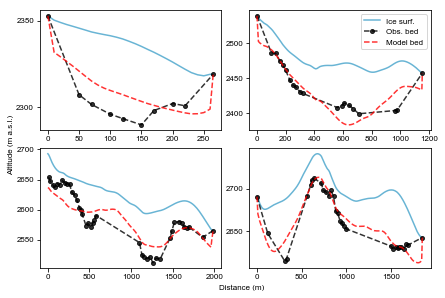

7015.6250125999995
55201.348430000005
87730.17494115
71279.2280563


In [244]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'

j,k = 0,0
n=0
dt['area_opt'] = dt.thick_opt * 10 
a=0.8
letter='a','b','c','d'

fig, ax = plt.subplots(2,2)
for i in range(4):
    
    # plot glacier surface
    ax[j,k].plot(dt[dt.line_opt==i].dist_opt, (dt[dt.line_opt==i].elev), color='#43a2ca', alpha=a, label='Ice surf.')
    
    #plot gpr thickness gates
    ax[j,k].plot(dt[dt.line==i].dist, (dt[dt.line==i].elev_gpr)-(dt[dt.line==i].thick), marker='o'
                 , ms=4, ls='--', color='k', alpha=a, label='Obs. bed')
    
#     if ((dt[dt.line==i].elev_gpr)-(dt[dt.line==i].thick)) > ((dt.elev[dt.line_opt==i])-(dt[dt.line_opt==i].thick_opt)).max():
#         ax[j,k].set_ylim(((dt[dt.line==i].elev_gpr)-(dt[dt.line==i].thick)+5), -5)
    
#     else:
#         ax[j,k].set_ylim(((dt.elev[dt.line_opt==i])-(dt[dt.line_opt==i].thick_opt)+5).max(), -5)
    
    ##plot optimized thickness gates
    ax[j,k].plot(dt[dt.line_opt==i].dist_opt, (dt.elev[dt.line_opt==i])-(dt[dt.line_opt==i].thick_opt), 
                 ls='--', c='r', alpha=a, label='Model bed')  #marker='o')
    
#     ax[j,k].set_ylim((dt[dt.line_opt==i].thick_opt.max()+5), -5)
#     ax[j,k].set_xlim((dt[dt.line==i].dist.min()-dt[dt.line==i].dist.min()*.9), ((dt[dt.line==i].dist.max())-(dt[dt.line==i].dist.max()*.9))
    ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(50)) ##
#     ax[j,k].text(0.05, 0.05, letter[i], transform=ax[j,k].transAxes, fontweight='bold', fontsize=10, verticalalignment='center', horizontalalignment='center',)
    n += 1

    k += 1
    if n == 2: 
        j += 1
        k = 0  
        
#     ax[j,k].set_xlabel('Distance (m)')
#     ax[j,k].set_ylabel('Ice thickness (m)')
    
    ax[0,1].legend()
      
fig.text(0.01, 0.6, 'Altitude (m a.s.l.)', rotation=90)
fig.text(0.5, 0.01, 'Distance (m)')     
fig.subplots_adjust(bottom=0.085, top=0.98, left=0.085, right=0.99, wspace=0.15, hspace=0.15) 
plt.savefig('/home/pelto/Desktop/ice_flux/Kokanee/products/Kokanee_flux_gates.png', dpi=300)
plt.show()

for i in range(4):
    area=dt[dt.line_opt==i].area_opt
    area_total = area.sum()
    print(area_total)        

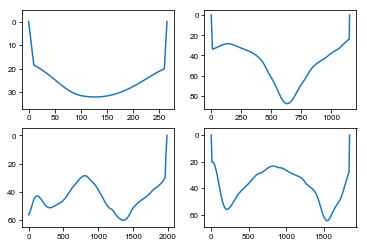

7015.6250125999995
55201.348430000005
87730.17494115
71279.2280563


In [245]:
dt['area_opt'] = dt.thick_opt * 10 

j,k = 0,0
n=0
fig, ax = plt.subplots(2,2)
for i in range(4):
    
    
    
    ax[j,k].plot(dt[dt.line_opt==i].dist_opt, dt[dt.line_opt==i].thick_opt)  #marker='o')
    ax[j,k].set_ylim((dt[dt.line_opt==i].thick_opt.max()+5), -5)
    
    n += 1

    k += 1
    if n == 2: 
        j += 1
        k = 0
    
#     ax[j,k].set_xlabel('Distance (m)')
#     ax[j,k].set_ylabel('Ice thickness (m)')
    
    
plt.show()

for i in range(4):
    area=dt[dt.line_opt==i].area_opt
    area_total = area.sum()
    print(area_total)


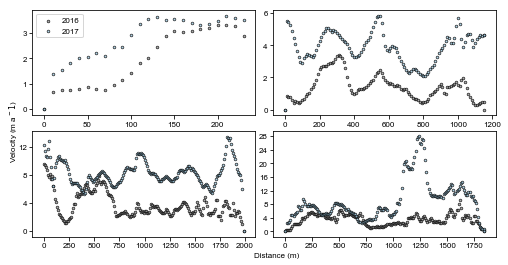

In [250]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'

j,k = 0,0
n=0
dt['area_opt'] = dt.thick_opt * 10 
a=0.8
letter='a','b','c','d'

fig, ax = plt.subplots(2,2, figsize=(7,3.5))
for i in range(4):
    
#     # plot glacier surface
#     ax[j,k].plot(dt[dt.line_opt==i].dist_opt, (dt[dt.line_opt==i].elev), color='#43a2ca', alpha=a, label='Ice surf.')
    
    #plot gpr thickness gates
    ax[j,k].scatter(dt[dt.line_v==i].dist_opt, (dt[dt.line_v==i].velocity_1516ss), marker='o', s=7, facecolor='0.6',
                    edgecolors='k', linewidths=0.75, alpha=a, label='2016')
    ax[j,k].scatter(dt[dt.line_v==i].dist_opt, (dt[dt.line_v==i].velocity_1617ss), marker='o', s=7, facecolor='#9ecae1',
                edgecolors='k', linewidths=0.75, alpha=a, label='2017')
#     ax[j,k].scatter(dt[dt.line_v==i].dist_opt, (dt[dt.line_v==i].velocity_1617sf), marker='o', s=7, facecolor='g',
#                 edgecolors='k', linewidths=0.75, alpha=a, label='2017')
    
#     if ((dt[dt.line==i].elev_gpr)-(dt[dt.line==i].thick)) > ((dt.elev[dt.line_opt==i])-(dt[dt.line_opt==i].thick_opt)).max():
#         ax[j,k].set_ylim(((dt[dt.line==i].elev_gpr)-(dt[dt.line==i].thick)+5), -5)
    
#     else:
#         ax[j,k].set_ylim(((dt.elev[dt.line_opt==i])-(dt[dt.line_opt==i].thick_opt)+5).max(), -5)
    
    ##plot optimized thickness gates
#     ax[j,k].plot(dt[dt.line_opt==i].dist_opt, (dt.elev[dt.line_opt==i])-(dt[dt.line_opt==i].thick_opt), 
#                  ls='--', c='r', alpha=a, label='Model bed')  #marker='o')
    
#     ax[j,k].set_ylim((dt[dt.line_opt==i].thick_opt.max()+5), -5)
#     ax[j,k].set_xlim((dt[dt.line==i].dist.min()-dt[dt.line==i].dist.min()*.9), ((dt[dt.line==i].dist.max())-(dt[dt.line==i].dist.max()*.9))
    if n == 0:
        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(1)) 
    elif n == 2 or n == 3:
        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(4.0))
    else:
        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(2.0))
#     ax[j,k].text(0.05, 0.05, letter[i], transform=ax[j,k].transAxes, fontweight='bold', fontsize=10, verticalalignment='center', horizontalalignment='center',)
    n += 1

    k += 1
    if n == 2: 
        j += 1
        k = 0  
        
#     ax[j,k].set_xlabel('Distance (m)')
#     ax[j,k].set_ylabel('Ice thickness (m)')
    
    ax[0,0].legend()
      
fig.text(0.01, 0.6, 'Velocity (m a$^-1$)', rotation=90)
fig.text(0.5, 0.01, 'Distance (m)')     
fig.subplots_adjust(bottom=0.09, top=0.99, left=0.06, right=0.98, wspace=0.08, hspace=0.15) 
plt.savefig('/home/pelto/Desktop/ice_flux/Kokanee/products/Kokanee_ice_velocity.png', dpi=300)
plt.show()

# for i in range(4):
#     area=dt[dt.line_opt==i].area_opt
#     area_total = area.sum()
#     print(area_total)        